### DEEP LEARNING CLASSIFICATION

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

Using TensorFlow backend.


In [4]:
data = pd.read_csv('features.csv')

In [5]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [6]:
X.shape

(1805, 13)

In [7]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.18 , random_state=0)

In [8]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [9]:
clf = Sequential()

In [40]:
clf.add(Dense(10,init ='uniform',activation ='tanh', input_dim = 13))
clf.add(Dense(8,init ='uniform',activation ='relu'))
clf.add(Dense(8,init ='uniform',activation ='relu'))
clf.add(Dense(5,init ='uniform',activation ='softmax'))

C:\Users\Aarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="tanh", input_dim=13, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\Aarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Aarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="softmax", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [41]:
clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
clf.fit(X_train,y_train,batch_size=7,epochs=120)

Epoch 1/120
1480/1480 [==============================] - 0s 325us/step - loss: 0.7500 - accuracy: 0.6770
Epoch 2/120
1480/1480 [==============================] - 0s 330us/step - loss: 0.7378 - accuracy: 0.6784
Epoch 3/120
1480/1480 [==============================] - 1s 344us/step - loss: 0.7580 - accuracy: 0.6655
Epoch 4/120
1480/1480 [==============================] - 1s 348us/step - loss: 0.7374 - accuracy: 0.6946
Epoch 5/120
1480/1480 [==============================] - 1s 373us/step - loss: 0.7362 - accuracy: 0.6899
Epoch 6/120
1480/1480 [==============================] - 1s 405us/step - loss: 0.7381 - accuracy: 0.6865
Epoch 7/120
1480/1480 [==============================] - 1s 354us/step - loss: 0.7438 - accuracy: 0.6878
Epoch 8/120
1480/1480 [==============================] - 0s 319us/step - loss: 0.7357 - accuracy: 0.6838
Epoch 9/120
1480/1480 [==============================] - 1s 364us/step - loss: 0.7362 - accuracy: 0.6858
Epoch 10/120
1480/1480 [==============================]

In [59]:
y_prediction = clf.predict(X_test)

In [60]:
y_prediction

array([[7.79451395e-04, 4.67677899e-02, 5.85344553e-01, 3.66405517e-01,
        7.02664896e-04],
       [4.66229161e-03, 1.73590243e-01, 7.81895757e-01, 3.98512483e-02,
        5.01599970e-07],
       [5.51325320e-05, 4.86025820e-03, 1.40148491e-01, 7.31493115e-01,
        1.23443000e-01],
       ...,
       [6.24436725e-05, 5.46946190e-03, 1.54757053e-01, 7.44274676e-01,
        9.54364315e-02],
       [2.28192628e-04, 1.69290230e-02, 3.33817631e-01, 6.37590349e-01,
        1.14348475e-02],
       [4.19338676e-06, 3.98398755e-04, 1.43147986e-02, 1.93283632e-01,
        7.91998982e-01]], dtype=float32)

In [61]:
y_pred = np.argmax(y_prediction, axis=1)

In [62]:
y_pred.shape

(325,)

In [63]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

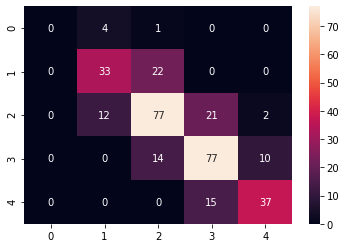

In [64]:
sns.heatmap(cm, annot=True)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6892307692307692